Alex Hemmerlin
Comp 435 Project 1
Data Exploration
English Handwritten Characters: https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset

About the Dataset:
The dataset contains 3,410 unique images of handwritten English characters. The characters are lowercase alphabetical: a-z, uppercase alphabetical: A-Z, and numeric digits: 0-9. This results in 62 classes (26+26+10) with 55 images of each class represented in the dataset.

The class label is the character that is represented in the image (0-9, A-Z, a-z). The feature is the image which is a 1200x900 png image.

In [348]:
# Comments of the format ***[DESCRIPTION]*** denote the origin of each code block

In [349]:
# Citation
# @InProceedings{deCampos09,
#   author    = "de Campos, T.~E. and Babu, B.~R. and Varma, M.",
#   title     = "Character recognition in natural images",
#   booktitle = "Proceedings of the International Conference on Computer
#   Vision Theory and Applications, Lisbon, Portugal",
#   month     = "February",
#   year      = "2009",
# }

In [350]:
# TODO: Ideas for data exploration:
# 1. Write code to lower the resolution of the images
#   - Iteratively see how they look before and after and where it might be too compressed to model well
# 2. See if ratio of coverage (writing to blank space) differs between some letters
# 3. See if height and width differ significantly between certain letters
# 4. Possibly use libraries to mark endpoints
# 5. Possibly use libraries to find enclosed white space

In [351]:
# ***MY CODE***
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

DATASET_PATH: str = 'dataset/english.csv'   # path to the csv file
BASE_IMAGE_PATH: str = 'dataset/'           # path to the Img folder (concat the image string in the csv to the end to get the path to the image)


In [352]:
# ***MY CODE***
df = pd.read_csv(DATASET_PATH)
df.head()


,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


DataFrame consists of two columns:
- The first is the path to the image
- The second is the image label

In [353]:
# ***MY CODE***
df["label"].value_counts()

0    55
k    55
X    55
Y    55
Z    55
     ..
P    55
Q    55
R    55
S    55
z    55
Name: label, Length: 62, dtype: int64

All classes are equally represented, and there are no missing labels or unusual values

In [354]:
# ***CODE FROM https://www.kaggle.com/code/nourrrgfvutf/english-characters CODE BLOCK 19***

# def display_images(rows, cols, images, labels, decoder):
#     _, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(12,6))

#     for i, ax in enumerate(axes.flatten()):
#         ax.imshow(images[i], cmap='gray')
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.set_title(f"Label: {decoder[np.where(labels[i]==1)[0][0]]}")
        
# display_images(3, 3, images, labels, decoder)

In [ ]:
# ***ABOVE CODE - MODIFIED BY ME***
def display_images(rows, cols, images, labels, examples): # added examples so that I can plot the example number as well
    _, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(12,6)) # changed to actually use the rows and cols args
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Label: {labels[i]}  Ex:{examples[i]}') # changed because I don't need to decode the labels

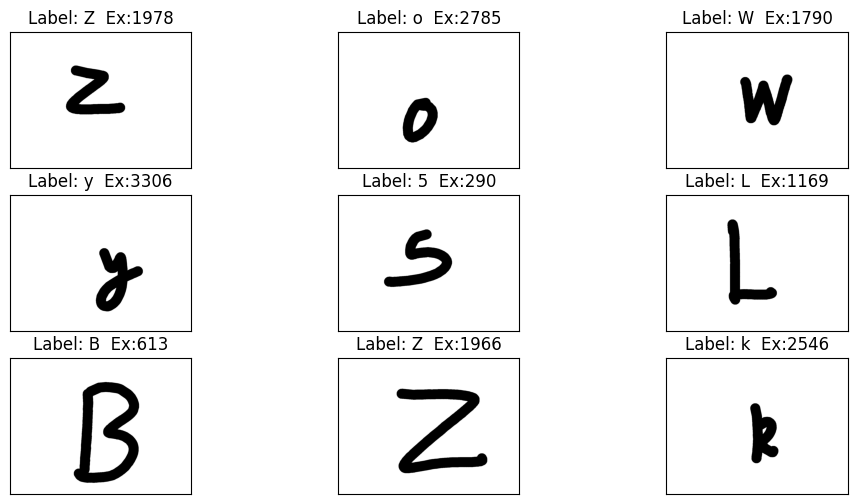

In [ ]:
# ***MY CODE***
rows = 3
cols = 3
images = []
labels = []
examples = []
for _ in range(rows*cols):
    num: int = random.randint(0, 3410)
    images.append(Image.open(f'{BASE_IMAGE_PATH}{df["image"][num]}'))
    labels.append(df['label'][num])
    examples.append(num)

# Plot/Display Random examples from the dataset
display_images(rows, cols, images, labels, examples)

Interesting Examples:
- 2993 (cursive s)
- 2972 (cursive s)
- 1382 (P looks like p)
- 1041 (I looks like l) -> (capital i, but looks like lowercase L)
- 2816 (cursive p looks like h)
- 2157 (d looks like a)
- 2234 (e looks like c)
- 3409 (cursive z)
- 2969 (cursive r)

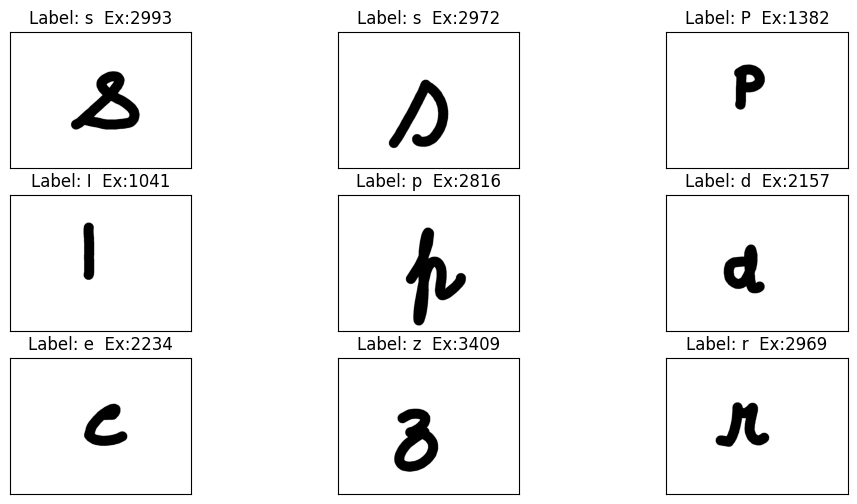

In [ ]:
# ***MY CODE***
# Displays a few interesting examples that I found in the data set
interesting_examples = [2993, 2972, 1382, 1041, 2816, 2157, 2234, 3409, 2969]
display_images(3, 3, [Image.open(f'{BASE_IMAGE_PATH}{df["image"][ex]}') for ex in interesting_examples], [df['label'][ex] for ex in interesting_examples], interesting_examples)